In [1]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *

Autosaving every 300 seconds


# Résolution de système linéaires
Il existe des méthodes dites directes pour résoudre les systèmes linéaires. 
Ces méthodes, le pivot de Gauss par exemple, reposent sur une succession finie  de transformation en système équivalent qui conduit à un système trivial (matrice diagonale, ou matrice triangulaire).

Il existe aussi des méthodes dites indirectes ou itératives qui consistent à fabriquer une suite de vecteurs qui a vocation a converger vers la solution du système. On arrête alors les itérés de la suite lorsque le résidu ($\Vert Ax-b\Vert$) est petit.

Selon les propriétés de la matrice, certaines méthodes sont plus adaptées que d'autres, certaines proscrites. Dans tous les cas, une étape fondamentale pour gagner en précision de résolution et/ou en temps calcul est de préconditionner le système

## Propriétés de matrices

### Conditionnement d'une matrice
**Définition :** On définit le conditionnement d'une matrice $A$ inversible par le nombre
$$\kappa(A)=\Vert A\Vert\Vert A^{−1}\Vert.$$ 

Ce nombre, plus il est grand, traduit la sensibilité de la solution $x$ du système $Ax=b$ lorsqu'on perturbe les coefficients de $A$ ou $b$. Lorsque la norme qui s'applique à $A$ est choisie comme la norme Euclidienne ($l^2$), ce nombre $\kappa(A)$ coïncide avec le rapport de la plus grande valeure propre en module sur la plus petite.

Il faudra veiller, dans la mesure du possible, à construire des systèmes à faible conditionnement. A défaut, il faudra prévoir de travailler sur un système équivalent à conditionnement plus faible. On parle alors de préconditionnement à l'aide de préconditionneur (cf plus tard).

### Matrices symétriques réelles
**Propriété :** Les valeurs propres sont réelles et les vecteurs propres associées à deux valeurs propres distinctes sont orthogonaux.
### Matrices définies positives
**Définition :** Une matrice carrée $A$ de taille $(n,n)$ est dite définie positive si pour tout vecteur $x$ non nul de $\mathbb R^n$
$$
(Ax,x)>0,
$$
où $(.,.)$ est le produit scalaire de $\mathbb R^n$.
### Matrices à diagonales dominantes
**Définition :** Une matrice est dite à diagonale dominante si le terme diagonale (réelle) domine la somme des modules des autres termes. La dominance est stricte si l'inégalité est stricte. La dominance est forte si l'inégalité est stricte pour au moins une ligne.

**Propriété :** Les Matrices réelles à diagonales strictement dominantes sont définies positives. 

**Propriété :** Les Matrices réelles à diagonales fortement dominantes et irréductibles sont définies positives. 

**Remarque :** La dominance seule ne suffit pas. On prendra par exemple une matrice carrée réelle à diagonale dominante dont la somme des termes par ligne fait zéro. Le vecteur constant est alors vecteur propre de la valeur propre nulle. La matrice n'est donc pas inversible.

**Définition :** Une matrice carrée $A$ est dite monotone si pour tout $x$ tel que $Ax\ge0$, on a $x\ge 0$.

**Propriété :** Une matrice monotone est telle que sa matrice inverse n'a que des coefficients positifs.

**Exercice :** Montrer que la matrice obtenue par différence finie centrée pour le problème de Dirichlet 1D est monotone et sa matrice inverse n'a que des coefficients strictement positifs.

- Pour plus de détails sur les propriétés des matrices pour l'analyse numérique, voir par exemple: Patrick Lascaux, Théodor : ANALYSE NUMERIQUE MATRICIELLE APPLIQUEE A L'ART DE L'INGENIEUR.

- Pour utiliser une librairie en fortran pour la résolution de système linéaire, LAPACK (pour Linear Algebra Package). 

In [10]:
A=2*eye(10)-diag(ones(9),1)-diag(ones(9),-1)
display(A)
display(inv(A))

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

array([[0.90909091, 0.81818182, 0.72727273, 0.63636364, 0.54545455,
        0.45454545, 0.36363636, 0.27272727, 0.18181818, 0.09090909],
       [0.81818182, 1.63636364, 1.45454545, 1.27272727, 1.09090909,
        0.90909091, 0.72727273, 0.54545455, 0.36363636, 0.18181818],
       [0.72727273, 1.45454545, 2.18181818, 1.90909091, 1.63636364,
        1.36363636, 1.09090909, 0.81818182, 0.54545455, 0.27272727],
       [0.63636364, 1.27272727, 1.90909091, 2.54545455, 2.18181818,
        1.81818182, 1.45454545, 1.09090909, 0.72727273, 0.36363636],
       [0.54545455, 1.09090909, 1.63636364, 2.18181818, 2.72727273,
        2.27272727, 1.81818182, 1.36363636, 0.90909091, 0.45454545],
       [0.45454545, 0.90909091, 1.36363636, 1.81818182, 2.27272727,
        2.72727273, 2.18181818, 1.63636364, 1.09090909, 0.54545455],
       [0.36363636, 0.72727273, 1.09090909, 1.45454545, 1.81818182,
        2.18181818, 2.54545455, 1.90909091, 1.27272727, 0.63636364],
       [0.27272727, 0.54545455, 0.8181818

## Méthodes directes

### Méthode de Gauss ou facorisation LU
**Propriété** Toute matrice carrée $A$ dont les sous-matrices sont inversibles possède une factorisation $A=LU$ avec $L$ une matrice triangulaire inférieure constituée de $1$ sur la diagonale et $U$ une matrice triangulaire supérieure qui ne contient pas de $0$ sur la diagonale.

Cette factorisation correspond à une méthode de Gauss qui conduit au système équivalent triangulaire dont $U$ est la matrice. L'intérêt de conserver $L$ et $U$ pour une factorisation est de procéder à l'aide de $L$ et $U$ à la résolution du système autant de fois que la résolution est nécéssaire (ce qui arrive dans les problèmes d'évolution).

In [11]:
import numpy as np

def lu_factorization(A):
    """
    Effectue la factorisation LU d'une matrice carrée A.
    
    Paramètres:
    A (numpy.ndarray): Matrice carrée à factoriser.

    Renvoie:
    L (numpy.ndarray): Matrice inférieure.
    U (numpy.ndarray): Matrice supérieure.
    """
    n = A.shape[0]
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for i in range(n):
        # Calculer les éléments de la matrice U
        for j in range(i, n):
            U[i, j] = A[i, j]
            for k in range(i):
                U[i, j] -= L[i, k] * U[k, j]

        # Calculer les éléments de la matrice L
        for j in range(i, n):
            if i == j:
                L[i, i] = 1
            else:
                L[j, i] = A[j, i]
                for k in range(i):
                    L[j, i] -= L[j, k] * U[k, i]
                L[j, i] /= U[i, i]

    return L, U

# Exemple d'utilisation
A = np.array([[4, 3], [6, 3]], dtype=float)
L, U = lu_factorization(A)

print("Matrice A:")
print(A)
print("\nMatrice L:")
print(L)
print("\nMatrice U:")
print(U)

# Vérification de la décomposition
print("\nProduit L * U:")
print(np.dot(L, U))


Matrice A:
[[4. 3.]
 [6. 3.]]

Matrice L:
[[1.  0. ]
 [1.5 1. ]]

Matrice U:
[[ 4.   3. ]
 [ 0.  -1.5]]

Produit L * U:
[[4. 3.]
 [6. 3.]]


### Méthode du pivot de Gauss ou factorisation PLU
Lorsque une matrice $A$ n'a pas la propriété de sous-matrices inversibles, la factorisation qui étend $LU$ est $PLU$ où les permutations de ligne permettent la factorisation. Il s'agit de la factorisation correspondant au pivot de Gauss qui conduit au système triangulaire supérieure dont $U$ est la matrice.

**Propriété** Toute matrice carrée $A$ inversible possède une factorisation $A=PLU$ avec $P$ une matrice de permutation (donc orthogonale $P^{-1}=P^T$), $L$ une matrice triangulaire inférieure constituée de $1$ sur la diagonale et $U$ une matrice triangulaire supérieure qui ne contient pas de $0$ sur la diagonale.

In [4]:
import numpy as np

def plu_factorization(A):
    """
    Effectue la factorisation PLU d'une matrice carrée A.
    
    Paramètres:
    A (numpy.ndarray): Matrice carrée à factoriser.

    Renvoie:
    P (numpy.ndarray): Matrice de permutation.
    L (numpy.ndarray): Matrice inférieure.
    U (numpy.ndarray): Matrice supérieure.
    """
    n = A.shape[0]
    P = np.eye(n)  # Matrice de permutation
    L = np.zeros((n, n))  # Matrice inférieure
    U = np.copy(A)  # Matrice supérieure (initialement A)

    for i in range(n):
        # Trouver le pivot
        max_row = np.argmax(np.abs(U[i:n, i])) + i
        if i != max_row:
            # Échanger les lignes
            U[[i, max_row], :] = U[[max_row, i], :]
            P[[i, max_row], :] = P[[max_row, i], :]
            if i > 0:
                L[[i, max_row], :i] = L[[max_row, i], :i]

        # Calculer les valeurs de L et U
        for j in range(i + 1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j, i:] -= L[j, i] * U[i, i:]

        L[i, i] = 1  # Diagonale de L est 1

    return P, L, U

# Exemple d'utilisation
A = np.array([[4, 3, 2],
              [3, 5, 1],
              [2, 1, 3]], dtype=float)

P, L, U = plu_factorization(A)

print("Matrice A:")
print(A)
print("\nMatrice P (permutation) :")
print(P)
print("\nMatrice L (inférieure) :")
print(L)
print("\nMatrice U (supérieure) :")
print(U)

# Vérification de la décomposition
print("\nProduit PLU :")
print(np.dot(P, np.dot(L, U)))


Matrice A:
[[4. 3. 2.]
 [3. 5. 1.]
 [2. 1. 3.]]

Matrice P (permutation) :
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Matrice L (inférieure) :
[[ 1.          0.          0.        ]
 [ 0.75        1.          0.        ]
 [ 0.5        -0.18181818  1.        ]]

Matrice U (supérieure) :
[[ 4.          3.          2.        ]
 [ 0.          2.75       -0.5       ]
 [ 0.          0.          1.90909091]]

Produit PLU :
[[4. 3. 2.]
 [3. 5. 1.]
 [2. 1. 3.]]


In [ ]:
program plu_factorization
  implicit none
  integer, parameter :: n = 3
  real(8) :: A(n, n) = reshape([ &
      4.0d0, 3.0d0, 2.0d0, &
      3.0d0, 5.0d0, 1.0d0, &
      2.0d0, 1.0d0, 3.0d0], [n, n])
  real(8) :: P(n, n), L(n, n), U(n, n)
  integer :: i, j, k, max_row
  real(8) :: temp

  ! Initialize matrices
  P = 0.0d0
  L = 0.0d0
  U = A
  do i = 1, n
    P(i, i) = 1.0d0
    L(i, i) = 1.0d0
  end do

  ! Perform PLU factorization
  do i = 1, n
    ! Find the pivot
    max_row = i
    do j = i + 1, n
      if (abs(U(j, i)) > abs(U(max_row, i))) then
        max_row = j
      end if
    end do

    ! Swap rows in U and P if needed
    if (i /= max_row) then
      ! Swap rows in U
      U([i, max_row], :) = U([max_row, i], :)
      ! Swap rows in P
      P([i, max_row], :) = P([max_row, i], :)
      ! Swap rows in L
      if (i > 1) then
        L([i, max_row], 1:i-1) = L([max_row, i], 1:i-1)
      end if
    end if

    ! Compute L and U
    do j = i + 1, n
      L(j, i) = U(j, i) / U(i, i)
      U(j, i:n) = U(j, i:n) - L(j, i) * U(i, i:n)
    end do
  end do

  ! Print results
  print *, "Matrix A:"
  call print_matrix(A)
  print *, "Matrix P (permutation):"
  call print_matrix(P)
  print *, "Matrix L (lower triangular):"
  call print_matrix(L)
  print *, "Matrix U (upper triangular):"
  call print_matrix(U)

  ! Verify the factorization
  print *, "Product PLU:"
  call print_matrix(matmul(P, matmul(L, U)))

contains

  subroutine print_matrix(matrix)
    real(8), dimension(n, n), intent(in) :: matrix
    integer :: i, j

    do i = 1, n
      write(*, '(3F10.4)', advance='no') (matrix(i, j), j = 1, n)
      print *
    end do
  end subroutine print_matrix

end program plu_factorization


### Factorisation $QR$
- $Q$ est orthogonal ($Q^TQ=I$) et $R$ est triangulaire supérieure
- méthode de Househölder
- interessante en cas de mauvais conditionnement 
- s'applique aux matrices non carrées.

### Exercices

#### Construire la matrice du problème de Dirichlet 1D par différences finies

Vérifier que votre matrice $A$ obtenue est tridiagonale à diagonale fortement dominante.
#### Appeler la factorisation $LU$
Vérifier le produit $LU$
#### Résoudre le système $Ax=b$
Donnez vous le second membre de votre choix, puis à l'aide de deux résolutions de système triangulaire, calculer $x$. Proposer cette algorithme dans une routine fortran qui dispose de $L,U,b$ en entrée et de $x$ en sortie (out) la solution.
#### Même exercice avec $PLU$

## Méthodes indirectes
On pourra écrire $A=M-N$ où $A,M,N$ sont des matrices carrées. Pour résoudre $Ax=b$, on cherchera un point fixe de $Mx=Nx+b$, avec la convergence (si elle a lieu) de la suite définie par 
$$
Mx^{k+1}=Nx^k+b
$$
où la résolution du système est simple si $M$ est bien choisi.

La convergence est assurée si
$$\Vert M^{-1}N\Vert<1$$
puisque 
$$\Vert x^{k+1}-x\Vert\le \Vert M^{-1}N\Vert \Vert x^{k}-x\Vert$$
et les suites géométriques de raison inférieure à $1$ convergent vers $0$.
### Algorithme de Jacobi
On choisit pour $M$ la matrice diagonale constituée de la diagonale de $A$. La convergence est assurée, en particulier, pour les matrices à diagonales strictement dominantes.


In [5]:
import numpy as np

def jacobi(A, b, x0=None, tol=1e-10, max_iterations=1000):
    """
    Résout le système d'équations linéaires A * x = b en utilisant la méthode de Jacobi.

    Paramètres:
    A (numpy.ndarray): Matrice des coefficients.
    b (numpy.ndarray): Vecteur des constantes.
    x0 (numpy.ndarray): Estimation initiale pour x. Si None, initialise à zéro.
    tol (float): Tolérance pour le critère de convergence.
    max_iterations (int): Nombre maximum d'itérations.

    Renvoie:
    x (numpy.ndarray): Solution du système.
    """
    n = len(b)
    x = np.zeros(n) if x0 is None else x0
    x_new = np.zeros_like(x)
    
    for iteration in range(max_iterations):
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        
        # Vérification de la convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        
        x = x_new.copy()
    
    raise Exception("La méthode de Jacobi n'a pas convergé après le nombre maximum d'itérations")

# Exemple d'utilisation
A = np.array([[4, -1, 0, 0],
              [-1, 4, -1, 0],
              [0, -1, 4, -1],
              [0, 0, -1, 3]], dtype=float)
b = np.array([15, 10, 10, 10], dtype=float)

solution = jacobi(A, b)
print("Solution:", solution)


Solution: [5. 5. 5. 5.]


### Algorithme de Gauss-Seidel
Ici la matrice $M$ est la partie triangulaire inférieure incluant la diagonale. Ce qui induit l'itération suivante à coder:
$$
x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij} x_j^{(k)} \right).
$$
La convergence est souvent plus rapide que par la méthode de Jacobi. 

In [6]:
import numpy as np

def gauss_seidel(A, b, x0=None, tol=1e-10, max_iterations=1000):
    """
    Résout le système d'équations linéaires A * x = b en utilisant la méthode de Gauss-Seidel.
    
    Paramètres:
    A (numpy.ndarray): Matrice des coefficients.
    b (numpy.ndarray): Vecteur des constantes.
    x0 (numpy.ndarray): Estimation initiale pour x. Si None, initialise à zéro.
    tol (float): Tolérance pour le critère de convergence.
    max_iterations (int): Nombre maximum d'itérations.
    
    Renvoie:
    x (numpy.ndarray): Solution du système.
    """
    n = len(b)
    x = np.zeros(n) if x0 is None else x0
    
    for iteration in range(max_iterations):
        x_new = np.copy(x)
        
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])  # Utiliser les nouvelles valeurs pour j < i
            sum2 = np.dot(A[i, i+1:], x[i+1:])  # Utiliser les anciennes valeurs pour j > i
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        
        # Vérification de la convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        
        x = x_new
    
    raise Exception("La méthode de Gauss-Seidel n'a pas convergé après le nombre maximum d'itérations")

# Exemple d'utilisation
A = np.array([[4, -1, 0, 0],
              [-1, 4, -1, 0],
              [0, -1, 4, -1],
              [0, 0, -1, 3]], dtype=float)
b = np.array([15, 10, 10, 10], dtype=float)

solution = gauss_seidel(A, b)
print("Solution:", solution)


Solution: [5. 5. 5. 5.]


### Algorithme du gradient conjugué

#### Pourquoi le gradient conjugué converge en $ n $ itérations pour une matrice symétrique définie positive de taille $ n \times n $ ?

Le gradient conjugué converge en au plus $ n $ itérations pour une matrice symétrique définie positive $ A $ de taille $ n \times n $ en raison des propriétés mathématiques spécifiques du processus de conjugaison des directions de descente et des espaces engendrés par ces directions.



1. **Propriétés de la matrice symétrique définie positive :**
   - Lorsque $ A $ est symétrique et définie positive, ses valeurs propres $ \lambda_i $ sont toutes réelles et strictement positives. Cela garantit une géométrie bien définie dans l'espace des solutions.
   - Un système linéaire $ A x = b $, avec $ A $ symétrique et définie positive, a une unique solution.

2. **Espaces de Krylov et indépendance linéaire :**
   - Le gradient conjugué génère une séquence de vecteurs de recherche conjugués $ p_1, p_2, \dots, p_n $, chacun dans un espace de Krylov associé à $ A $. Ces espaces sont définis comme :
     $
     K_i = \text{span}\{ r_0, A r_0, A^2 r_0, \dots, A^{i-1} r_0 \}
     $
     où $ r_0 $ est le résidu initial.
   - Les vecteurs $ p_i $ sont $ A $-orthogonaux (conjugués) entre eux, ce qui signifie :
     $
     p_i^T A p_j = 0 \quad \text{pour} \quad i \neq j
     $
   - Chaque nouvelle direction de recherche $ p_i $ est construite pour être indépendante linéairement des précédentes.

3. **Dimension finie de l'espace :**
   - Dans un espace de dimension $ n $, il existe au plus $ n $ directions de recherche indépendantes. Autrement dit, après $ n $ itérations, la méthode du gradient conjugué a exploré tout l'espace vectoriel de dimension $ n $ (via les sous-espaces de Krylov).
   - Après $ n $ itérations, la méthode a parcouru suffisamment de directions indépendantes pour atteindre la solution exacte dans l'espace de dimension $ n $.



4. **Exactitude de la solution en au plus $ n $ itérations :**
   - L'algorithme du gradient conjugué est optimal dans l'espace de Krylov. Il minimise l'erreur quadratique dans cet espace, ce qui signifie qu'après au plus $ n $ itérations, l'erreur est exactement nulle.
   - Cela découle du fait qu'après avoir parcouru $ n $ directions conjuguées, l'algorithme a effectivement "exploré" toute l'information dans l'espace de la matrice $ A $, et donc il trouve la solution exacte.
   - En pratique, cela n'est pas vrai car la machine introduit des erreurs machines dans les directions de descente et n'exploite donc pas toutes les directions de descentes. Il convient donc de stopper l'algorithme après un nombre donné d'itérations ($n$ par exemple mais souvent beaucoup moins selon la structure de la matrice...) puis de recommencer le même algorithme en partant d'un premier itéré qui est le résultat issu de la précédente résolution.

### Le code en python

In [1]:
import numpy as np

def conjugate_gradient(A, b, tol=1e-8, max_iter=None):
    """
    Résout le système linéaire Ax = b en utilisant la méthode du gradient conjugué.

    :param A: Matrice symétrique définie positive de taille (n, n)
    :param b: Vecteur (n,)
    :param tol: Tolérance pour la convergence (optionnel)
    :param max_iter: Nombre maximum d'itérations (optionnel)
    :return: Solution x
    """
    n = b.shape[0]
    
    # Initialisation
    x = np.zeros(n)  # Initialisation de x à zéro
    r = b - np.dot(A, x)  # Résidu initial
    p = r.copy()  # Direction initiale
    r_old = np.dot(r, r)
    
    # Si max_iter n'est pas défini, on le met à n
    if max_iter is None:
        max_iter = n
    
    for k in range(max_iter):
        Ap = np.dot(A, p)
        alpha = r_old / np.dot(p, Ap)
        
        # Mise à jour de la solution
        x = x + alpha * p
        
        # Mise à jour du résidu
        r = r - alpha * Ap
        r_new = np.dot(r, r)
        
        # Vérification de la convergence
        if np.sqrt(r_new) < tol:
            print(f"Convergence atteinte après {k+1} itérations.")
            break
        
        # Mise à jour de la direction
        beta = r_new / r_old
        p = r + beta * p
        
        r_old = r_new
    
    return x

# Exemple d'utilisation

    # Exemple : matrice symétrique définie positive
A = np.array([[4, 1], [1, 3]], dtype=float)
b = np.array([1, 2], dtype=float)
    
    # Résolution du système Ax = b
x = conjugate_gradient(A, b)
    
    # Affichage de la solution
print("Solution x :", x)


Convergence atteinte après 2 itérations.
Solution x : [0.09090909 0.63636364]


### Le code en Fortran

In [ ]:

program conjugate_gradient
    implicit none
    integer, parameter :: n = 100  ! Taille du système
    real(8) :: A(n,n), b(n), x(n), r(n), p(n), Ap(n)
    real(8) :: alpha, beta, r_old, r_new
    integer :: i, j, k, max_iter
    real(8), parameter :: tol = 1.0e-8

    ! Initialisation (Exemple d'une matrice A et vecteurs b)
    call initialize(A, b, n)

    ! Initialisation des variables
    x = 0.0D0
    r = b - matvec(A, x, n)
    p = r
    r_old = dot_product(r, r)
    max_iter = 1000

    ! Boucle du gradient conjugué
    do k = 1, max_iter
        Ap = matvec(A, p, n)
        alpha = r_old / dot_product(p, Ap)

        ! Mise à jour de la solution x et du résidu r
        x = x + alpha * p
        r = r - alpha * Ap

        r_new = dot_product(r, r)
        
        ! Vérification de la convergence
        if (sqrt(r_new) < tol) exit

        beta = r_new / r_old
        p = r + beta * p
        r_old = r_new
    end do

    ! Affichage du résultat
    print*, 'Nombre d''itérations : ', k
    print*, 'Solution x : ', x

contains
    ! Produit matrice-vecteur
    function matvec(A, x, n) result(Ax)
        real(8), dimension(n,n), intent(in) :: A
        real(8), dimension(n), intent(in) :: x
        real(8), dimension(n) :: Ax
        integer :: i, j

        Ax = 0.0D0
        do i = 1, n
            do j = 1, n
                Ax(i) = Ax(i) + A(i,j) * x(j)
            end do
        end do
    end function matvec

    ! Initialisation de la matrice A et du vecteur b
    subroutine initialize(A, b, n)
        real(8), dimension(n,n), intent(out) :: A
        real(8), dimension(n), intent(out) :: b
        integer, intent(in) :: n
        integer :: i, j

        ! Exemples de valeurs pour A et b
        A = 0.0D0
        do i = 1, n
            A(i,i) = 2.0D0  ! Diagonale principale
            if (i < n) A(i,i+1) = -1.0D0  ! Voisin inférieur
            if (i > 1) A(i,i-1) = -1.0D0  ! Voisin supérieur
        end do
        b = 1.0D0  ! Exemple simple où b = (1, 1, ..., 1)
    end subroutine initialize
end program conjugate_gradient


#### Pour les matrices non symétriques : BICGSTAB
L'idée est d'appliquer un algorithme de gradient conjugué sur la matrice $A^TA$ au lieu de la matrice $A$ (définie positive) afin de disposer d'une matrice symétrique définie positive pour laquelle la méthode du gradient conjugué converge. L'algorithme dit du bi-gradient conjugué stabilisé est décrit ci-dessous.


In [2]:
import numpy as np

def bicgstab(A, b, tol=1e-8, max_iter=None):
    """
    Résout le système linéaire Ax = b en utilisant l'algorithme BiCGSTAB.

    :param A: Matrice de taille (n, n)
    :param b: Vecteur (n,)
    :param tol: Tolérance pour la convergence (optionnel)
    :param max_iter: Nombre maximum d'itérations (optionnel)
    :return: Solution x
    """
    n = b.shape[0]
    
    # Initialisation de la solution x à zéro
    x = np.zeros(n)
    
    # Initialisation du résidu
    r = b - np.dot(A, x)
    r_hat = r.copy()  # Choix arbitraire de r_hat, ici égal à r initial
    rho_old = alpha = omega = 1.0
    v = p = np.zeros(n)
    
    # Si max_iter n'est pas défini, on le met à 2 * n
    if max_iter is None:
        max_iter = 2 * n
    
    for k in range(max_iter):
        rho_new = np.dot(r_hat, r)
        
        if abs(rho_new) < tol:
            print(f"Rupture de l'algorithme, rho_new proche de zéro.")
            break
        
        if k == 0:
            p = r
        else:
            beta = (rho_new / rho_old) * (alpha / omega)
            p = r + beta * (p - omega * v)
        
        v = np.dot(A, p)
        alpha = rho_new / np.dot(r_hat, v)
        s = r - alpha * v
        
        if np.linalg.norm(s) < tol:
            x = x + alpha * p
            print(f"Convergence atteinte après {k+1} itérations.")
            break
        
        t = np.dot(A, s)
        omega = np.dot(t, s) / np.dot(t, t)
        
        x = x + alpha * p + omega * s
        r = s - omega * t
        
        rho_old = rho_new
        
        # Vérification de la convergence
        if np.linalg.norm(r) < tol:
            print(f"Convergence atteinte après {k+1} itérations.")
            break
    
    return x


    # Exemple de matrice non symétrique
A = np.array([[4, 1], [2, 3]], dtype=float)
b = np.array([1, 2], dtype=float)
    
    # Résolution du système Ax = b
x = bicgstab(A, b)
    
    # Affichage de la solution
print("Solution x :", x)


Convergence atteinte après 2 itérations.
Solution x : [0.1 0.6]


### Code en Fortran

In [ ]:
program bicgstab
  implicit none
  integer, parameter :: dp = selected_real_kind(15, 307)
  integer :: n, max_iter, i, j
  real(dp), parameter :: tol = 1.0e-8
  real(dp) :: alpha, beta, omega, rho, rho_old, norm_b, norm_r
  real(dp), dimension(:), allocatable :: r, r_hat, v, p, s, t, x, b, A_diag
  real(dp), dimension(:,:), allocatable :: A

  ! Initialisation du problème (taille de la matrice, nombre d'itérations, etc.)
  n = 5          ! Taille de la matrice (exemple)
  max_iter = 100 ! Nombre maximal d'itérations

  ! Allocation des vecteurs et matrices
  allocate(A(n,n), r(n), r_hat(n), v(n), p(n), s(n), t(n), x(n), b(n), A_diag(n))

  ! Initialisation des matrices et vecteurs (exemple arbitraire)
  A = 0.0_dp
  do i = 1, n
    A(i,i) = 4.0_dp
    if (i < n) then
      A(i,i+1) = -1.0_dp
      A(i+1,i) = -1.0_dp
    end if
  end do
  b = (/15.0_dp, 10.0_dp, 10.0_dp, 10.0_dp, 5.0_dp/)
  x = 0.0_dp   ! Initialisation du vecteur solution à zéro

  ! Norme de b pour le critère d'arrêt
  norm_b = sqrt(sum(b**2))

  ! Calcul de r = b - A*x (résidu initial)
  call matvec(A, x, r, n)
  r = b - r
  r_hat = r
  norm_r = sqrt(sum(r**2))

  ! Vérification de la convergence initiale
  if (norm_r / norm_b < tol) then
    print *, 'Converged without iterations'
    stop
  end if

  rho = 1.0_dp
  alpha = 1.0_dp
  omega = 1.0_dp
  p = 0.0_dp
  v = 0.0_dp

  ! Boucle principale de BiCGSTAB
  do i = 1, max_iter
    rho_old = rho
    rho = dot_product(r_hat, r)

    if (rho == 0.0_dp) then
      print *, 'Method failed: rho = 0'
      exit
    end if

    if (i == 1) then
      p = r
    else
      beta = (rho / rho_old) * (alpha / omega)
      p = r + beta * (p - omega * v)
    end if

    ! Calcul de v = A * p
    call matvec(A, p, v, n)

    alpha = rho / dot_product(r_hat, v)
    s = r - alpha * v

    ! Vérification de la convergence
    norm_r = sqrt(sum(s**2))
    if (norm_r / norm_b < tol) then
      x = x + alpha * p
      print *, 'Converged after', i, 'iterations'
      exit
    end if

    ! Calcul de t = A * s
    call matvec(A, s, t, n)

    omega = dot_product(t, s) / dot_product(t, t)

    x = x + alpha * p + omega * s
    r = s - omega * t

    ! Vérification de la convergence
    norm_r = sqrt(sum(r**2))
    if (norm_r / norm_b < tol) then
      print *, 'Converged after', i, 'iterations'
      exit
    end if

    ! Vérification de l'échec
    if (omega == 0.0_dp) then
      print *, 'Method failed: omega = 0'
      exit
    end if
  end do

  print *, 'Failed to converge after', max_iter, 'iterations'

  ! Libération de la mémoire allouée
  deallocate(A, r, r_hat, v, p, s, t, x, b, A_diag)

contains

  ! Sous-programme pour le produit matrice-vecteur
  subroutine matvec(A, x, y, n)
    real(dp), dimension(n,n), intent(in) :: A
    real(dp), dimension(n), intent(in) :: x
    real(dp), dimension(n), intent(out) :: y
    integer, intent(in) :: n
    integer :: i

    y = 0.0_dp
    do i = 1, n
      y(i) = dot_product(A(i,:), x)
    end do
  end subroutine matvec

end program bicgstab


## Matrices creuses

Les matrices issues des discrétisations différences finies ou éléments finis pour des EDPs classiques (opérateur différentiel calculé ponctuellement) sont particulièrement creuses. Seulement un nombre de coefficients non nuls sont d'ordre $N$  pour une matrice $(N,N)$. Il est essentiel, pour un gain mémoire et calcul de procéder à de tels stockages.
#### Stockage diagonale
C'est un système simple de stockage lorsqu'on sait que la structure de la matrice est diagonale. C'est le cas en différence finie sur grille cartésienne. C'est encore le cas sur maillage cartésien en élément fini, mais la structure devient inconnue pour un maillage quelconque.

On va illustrer en python l'efficacité du stockage diagonal.

temps calcul: 4.283123254776001


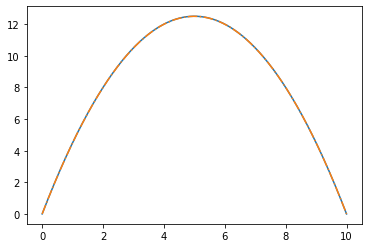

In [28]:
#
N=10000
L=10
h=L/(N-1)
A=2*diag(ones(N))-diag(ones(N-1),-1)-diag(ones(N-1),1)
A/=h**2
#print(A)
t_debut=time.time()
u=solve(A,ones(N))
t_fin=time.time()
print('temps calcul:',t_fin-t_debut)
x=linspace(h,L-h,N)
plot(x,u)
plot(x,0.5*x*(L-x),'-.')

temps calcul: 0.009630918502807617


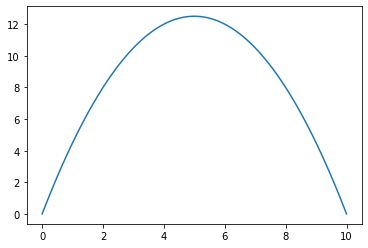

In [39]:
from scipy.sparse import  spdiags
from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix, spdiags

N=10000
L=10
h=L/(N-1)
A=2*spdiags(ones(N),[0],N,N)-spdiags(ones(N),[-1],N,N)-spdiags(ones(N-1),[1],N,N)
A/=h**2
A=A.tocsr()
#print(A)
t_debut=time.time()
u=spsolve(A,ones(N))
t_fin=time.time()
print('temps calcul:',t_fin-t_debut)
plot(linspace(h,L-h,N),u)

In [10]:
# le stockage diagonal fait maison
N=100
h=1/(N+1)
d=zeros((N,4))
d[:,0]=4
d[:,1]=-1
d[:,2]=-2
d[:,3]=-1
#d/=h**2

i_decal=array([0,1,-1,-2])
def matvec(d,i_d,x):
    y=zeros(size(x))
    for j in range(size(i_d)):
        y[max(-i_d[j],0):min(N,N-i_d[j])]+=d[max(i_d[j],0):min(N,N+i_d[j]),j]*x[max(i_d[j],0):min(N,N+i_d[j])]
    return y
print(matvec(d,i_decal,ones(N))) 

[3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


##### Exercices
- Proposer le stockage tridiagonal pour le problème de Dirichlet 1D en fortran 
- Coder le produit matrice vecteur avec cette structure de matrice
- Etendre vos solveurs gradient conjugué et BICGstab en conséquence
- Comparer le temps calcul entre la résolution pleine et creuse pour différentes taille de grille.
- Faites le même travail pour le problème de Dirichlet 2D avec un stockage pintadiagonale. 
- Pour une utilisation la plus large possible, on pourra déclarer un tableau de taille $N\times d$ où $N$ est la taille de la grille (taille du vecteur inconnu) et $d$ le nombre de diagonale. On disposera aussi d'un tableau d'entiers de taille $d$ qui donne l'entier relatif du décalage de la diagonale considérée par rapport à la diagonale principale. 

#### Stockage CSR
Le format CSR (Compressed Sparse Row) est une méthode efficace pour stocker des matrices creuses (sparse) en ne gardant en mémoire que les éléments non nuls, réduisant ainsi la consommation mémoire. Ce format est particulièrement utilisé dans le cadre des calculs scientifiques pour les systèmes d'équations de grandes dimensions.

Structure du format CSR :
Le stockage CSR utilise trois tableaux principaux :

values : Contient tous les éléments non nuls de la matrice, rangés ligne par ligne.

col_indices : Contient les indices des colonnes correspondants à chaque élément non nul dans le tableau values.

row_ptr : Stocke les indices dans le tableau values où commence chaque nouvelle ligne de la matrice. Le dernier élément de ce tableau pointe à la fin du tableau values pour connaître la taille totale.

Exemples de matrice et de son stockage en CSR
Considérons la matrice creuse suivante :
$$
A = \begin{pmatrix}
10 & 0 & 0 & 0 & 0 \\
3  & 9 & 0 & 0 & 0 \\
0  & 7 & 8 & 7 & 0 \\
3  & 0 & 8 & 7 & 5 \\
0  & 8 & 0 & 9 & 9
\end{pmatrix}
$$
 
**Stockage CSR :**
- values : Contient les valeurs non nulles ligne par ligne :

$$
    \texttt{values} = [10, 3, 9, 7, 8, 7, 3, 8, 7, 5, 8, 9, 9]
$$
    
- col_indices : Contient les indices des colonnes correspondantes pour chaque élément non nul dans values  :
$$
\texttt{col-indices} = [0, 0, 1, 1, 2, 3, 0, 2, 3, 4, 1, 3, 4]
$$
    
- row_ptr : Contient les indices dans values où chaque ligne commence (la longueur de ce tableau est $n+1$, où $n$ est le nombre de lignes de la matrice) :
$$
\texttt{row-ptr} = [0, 1, 3, 6, 10, 13]
$$
Cela signifie :

- La ligne 1 commence à l'index 0 dans values.
- La ligne 2 commence à l'index 1.
- La ligne 3 commence à l'index 3, et ainsi de suite.

**Avantages du format CSR :**
Mémoire : Économie significative de mémoire par rapport à une matrice pleine, surtout pour les matrices creuses où la plupart des éléments sont nuls.
Calculs efficaces : Accélération des opérations telles que le produit matrice-vecteur  car seules les valeurs non nulles sont stockées et utilisées.

**Inconvénients :**
Accès aléatoire : L'accès à des éléments individuels de la matrice est plus compliqué, car il faut parcourir les tableaux values et col_indices.
Modifications : Les ajouts ou modifications d'éléments sont coûteux en termes de calculs, car il faut réorganiser les tableaux.

Pour cela, on n'assemble pas les matrices avec ce format mais un format de liste qui n'alloue les places mémoires qu'au fur et à mesure en profitant d'un ordonnancement des données. Pour celà, en python, le format lil_matrix est utilisé. Une fois assemblée, les matrices sont converties au format CSR. En voici une démonstration en python.

In [11]:

from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix, spdiags
N=71
L=7
h=L/(N-1)
#remplissage de la matrice
#le format  LIL (list de list) permet de remplir 
#les coefficients d'une matrice creuse en accedant à sa position 
#ligne colonne
#A est ici initialisée à la matrice nulle de la taille considérée
A =lil_matrix((N, N))
#construction de la matrice élémentaire du terme integral
el=array([[1,-1],[-1,1]])/h
#Parcours des éléments
for k in range(N-1):
    S=array([k,k+1])# ce tableau contient les numéros des 2 sommets
    for i in range(2):
        for j in range(2):
            A[S[i],S[j]]=A[S[i],S[j]]+el[i,j]
# la matrice A ici construite ne contient que la contribution 
#intégrale, soit celle qu'on aurait eu avec de CL de Neuman homogène
#
#On va rajouter les termes provenant des CL de Robin
a0=30
a1=20
A[0,0]=A[0,0]+a0
A[N-1,N-1]=A[N-1,N-1]+a1
print(A)
A.toarray()

  (0, 0)	40.0
  (0, 1)	-10.0
  (1, 0)	-10.0
  (1, 1)	20.0
  (1, 2)	-10.0
  (2, 1)	-10.0
  (2, 2)	20.0
  (2, 3)	-10.0
  (3, 2)	-10.0
  (3, 3)	20.0
  (3, 4)	-10.0
  (4, 3)	-10.0
  (4, 4)	20.0
  (4, 5)	-10.0
  (5, 4)	-10.0
  (5, 5)	20.0
  (5, 6)	-10.0
  (6, 5)	-10.0
  (6, 6)	20.0
  (6, 7)	-10.0
  (7, 6)	-10.0
  (7, 7)	20.0
  (7, 8)	-10.0
  (8, 7)	-10.0
  (8, 8)	20.0
  (8, 9)	-10.0
  (9, 8)	-10.0
  (9, 9)	20.0
  (9, 10)	-10.0
  (10, 9)	-10.0
  (10, 10)	20.0
  (10, 11)	-10.0
  (11, 10)	-10.0
  (11, 11)	20.0
  (11, 12)	-10.0
  (12, 11)	-10.0
  (12, 12)	20.0
  (12, 13)	-10.0
  (13, 12)	-10.0
  (13, 13)	20.0
  (13, 14)	-10.0
  (14, 13)	-10.0
  (14, 14)	20.0
  (14, 15)	-10.0
  (15, 14)	-10.0
  (15, 15)	20.0
  (15, 16)	-10.0
  (16, 15)	-10.0
  (16, 16)	20.0
  (16, 17)	-10.0
  (17, 16)	-10.0
  (17, 17)	20.0
  (17, 18)	-10.0
  (18, 17)	-10.0
  (18, 18)	20.0
  (18, 19)	-10.0
  (19, 18)	-10.0
  (19, 19)	20.0
  (19, 20)	-10.0
  (20, 19)	-10.0
  (20, 20)	20.0
  (20, 21)	-10.0
  (21, 20)	-10.0
  (21, 2

array([[ 40., -10.,   0., ...,   0.,   0.,   0.],
       [-10.,  20., -10., ...,   0.,   0.,   0.],
       [  0., -10.,  20., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  20., -10.,   0.],
       [  0.,   0.,   0., ..., -10.,  20., -10.],
       [  0.,   0.,   0., ...,   0., -10.,  30.]])

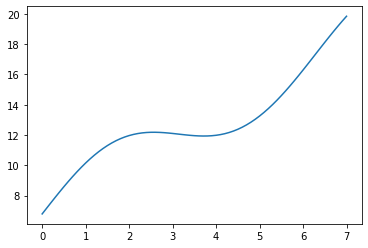

In [14]:
#construction du second membre
b0=200
b1=400
x=linspace(0,L,N)
fx=2*sin(x)#on a choisi f(x)=2sin(x) 
F=h*fx
F[0]=F[0]*0.5+b0
F[N-1]=F[N-1]*0.5+b1
#conversion en csr (compressed storage row) pour resolution system
A=A.tocsr()
#resolution systeme creux
U=spsolve(A,F)
plot(x,U);

## Préconditionneurs
Si on fait abstraction du coût du calul du préconditionneur, ce qui est souvent légitime pour les problèmes d'évolution où on peut résoudre le même système sans limite pour progresser en temps, on peut se poser la question de quel est le meilleur préconditionneur.

Une réponse hative consisterait à choisir $A^{-1}$ puisque pour résoudre
$Ax=b$, on se contenterait de faire un produit matrice vecteur : $x=A^{-1}b$.

Sauf que si $A$ est la matrice creuse du problème de Dirichlet (ou Neumann), $A^{-1}$ est une matrice pleine (pas un seul coefficient est nul!) et la produit $A^{-1}b$ a une complexité énorme en $N^2$. On attend mieux d'un solveur linéaire.  
Inversement, si $A^{-1}$ est creux avec de l'ordre de $N$ coefficients non nuls, c'est très intéressant... mais cette situation n'arrive pas en pratique pour les problèmes que l'on considère.



### Jacobi
C'est le préconditionneur le plus simple, il consiste à diviser chaque ligne du système par le coefficient diagonal. Il évite de donner un poids anormal dans le résidu aux lignes artificiellement trop pondérées.
### ILU
incomplète LU, c'est une solution à tester pour des comparaisons de coût calcul.
### Multigrille
Les préconditionneurs multigrilles algébriques sont les plus efficaces en général. Ils trouvent leur limite lorsque les coefficients du système présentent beaucoup d'anisotropie. 

Le principe d'un préconditionneur multigrille repose sur l'utilisation de plusieurs niveaux de résolution pour accélérer la convergence des méthodes itératives de résolution de systèmes d'équations linéaires, en particulier pour les grands systèmes issus de la discrétisation des équations aux dérivées partielles.

##### Étapes principales 
- Problème à haute résolution : Le problème est initialement résolu à un niveau de grille fine (haute résolution).

- Restriction : Les erreurs résiduelles à ce niveau fin sont projetées (restreintes) sur une grille plus grossière (moyenne de la solution des indices voisins) où les erreurs de basse fréquence sont plus faciles à résoudre.

- Résolution sur la grille grossière : Un problème simplifié est résolu sur cette grille grossière, souvent avec une méthode itérative rapide (comme Gauss-Seidel ou Jacobi ou Gradient Conjugué).

- Prolongation : La correction obtenue est ensuite interpolée et ajoutée à la solution de la grille fine, améliorant ainsi la solution initiale.

- V-Cycle ou W-Cycle : Ce processus est répété plusieurs fois, en passant entre différentes échelles de résolution (grilles fines et grossières) jusqu'à convergence.

##### Avantage principal 
Les préconditionneurs multigrilles améliorent l'efficacité en traitant les erreurs de haute et basse fréquence à différents niveaux de résolution, ce qui permet une convergence rapide, même pour des systèmes de très grande taille. On peut obtenir dans les problèmes classiques des EDPs comme pour l'approximation de l'opérateur de Dirichlet ou Neumann (matrices très creuses), une complexité en $N\log(N)$ où $N$ est la taille du vecteur inconnu. On notera qu'un produit matrice vecteur sur grille fine (taille du système à résoudre) a une complexité en $N$. S'il fallait $N$ itérations d'une méthode itérative pour converger la complexité en $N^2$ serait comparativement énorme.

Ces préconditionneurs sont à chercher dans les bibliothèques les plus performantes de calcul scientifique.
#### Exercice
Coder en fortran un préconditionneur Jacobi.

In [15]:
print(A)

  (0, 0)	40.0
  (0, 1)	-10.0
  (1, 0)	-10.0
  (1, 1)	20.0
  (1, 2)	-10.0
  (2, 1)	-10.0
  (2, 2)	20.0
  (2, 3)	-10.0
  (3, 2)	-10.0
  (3, 3)	20.0
  (3, 4)	-10.0
  (4, 3)	-10.0
  (4, 4)	20.0
  (4, 5)	-10.0
  (5, 4)	-10.0
  (5, 5)	20.0
  (5, 6)	-10.0
  (6, 5)	-10.0
  (6, 6)	20.0
  (6, 7)	-10.0
  (7, 6)	-10.0
  (7, 7)	20.0
  (7, 8)	-10.0
  (8, 7)	-10.0
  (8, 8)	20.0
  :	:
  (62, 62)	20.0
  (62, 63)	-10.0
  (63, 62)	-10.0
  (63, 63)	20.0
  (63, 64)	-10.0
  (64, 63)	-10.0
  (64, 64)	20.0
  (64, 65)	-10.0
  (65, 64)	-10.0
  (65, 65)	20.0
  (65, 66)	-10.0
  (66, 65)	-10.0
  (66, 66)	20.0
  (66, 67)	-10.0
  (67, 66)	-10.0
  (67, 67)	20.0
  (67, 68)	-10.0
  (68, 67)	-10.0
  (68, 68)	20.0
  (68, 69)	-10.0
  (69, 68)	-10.0
  (69, 69)	20.0
  (69, 70)	-10.0
  (70, 69)	-10.0
  (70, 70)	30.0


In [19]:
B=A.toarray()
inv(B)

array([[3.31764706e-02, 3.27058824e-02, 3.22352941e-02, ...,
        1.17647059e-03, 7.05882353e-04, 2.35294118e-04],
       [3.27058824e-02, 1.30823529e-01, 1.28941176e-01, ...,
        4.70588235e-03, 2.82352941e-03, 9.41176471e-04],
       [3.22352941e-02, 1.28941176e-01, 2.25647059e-01, ...,
        8.23529412e-03, 4.94117647e-03, 1.64705882e-03],
       ...,
       [1.17647059e-03, 4.70588235e-03, 8.23529412e-03, ...,
        2.41176471e-01, 1.44705882e-01, 4.82352941e-02],
       [7.05882353e-04, 2.82352941e-03, 4.94117647e-03, ...,
        1.44705882e-01, 1.46823529e-01, 4.89411765e-02],
       [2.35294118e-04, 9.41176471e-04, 1.64705882e-03, ...,
        4.82352941e-02, 4.89411765e-02, 4.96470588e-02]])